<a href="https://colab.research.google.com/github/abhinavgairola/Sprinboard_projects/blob/master/Relax_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import pandas as pd


In [ ]:
#with open ('/content/drive/MyDrive/relax_challenge/takehome_user_engagement.csv') as file:
  #iterator = csv.DictReader(file)
  #for line in iterator:
    #print("These are the values{}, keys {}".format(list(line.values()),list(line.keys())))




###A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product. Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.

In [630]:
df_engagement = pd.read_csv('/content/drive/MyDrive/relax_challenge/takehome_user_engagement.csv')

In [634]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [635]:
df_engagement['time_stamp'] = pd.to_datetime(df_engagement['time_stamp'])
df_engagement.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [636]:
import datetime
seven_days = datetime.timedelta(7)#np.timedelta64(7,'D')



,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [664]:
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    passed_days = df['date'].diff(periods=logins-1)
    return any(passed_days <= timedelta(days=days))

In [669]:
adopted = df_engagement.groupby('user_id').apply(logins_in_days)

In [670]:
sum(adopted)

1656

## 1656 adopted users were identified.

In [ ]:
df_engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [682]:
df_users = pd.read_csv('/content/drive/MyDrive/relax_challenge/takehome_users.csv',encoding='latin-1')

In [683]:
cols = ['object_id', 'creation_source', 'creation_time', 
        'last_session_creation_time', 'opted_in_to_mailing_list',
        'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
users = pd.read_csv('/content/drive/MyDrive/relax_challenge/takehome_users.csv',encoding='latin-1', usecols=cols)
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [684]:
users['creation_time'] = pd.to_datetime(
    users['creation_time'], format='%Y-%m-%d %H:%M:%S')
users['last_session_creation_time'] = pd.to_datetime(
    users['last_session_creation_time'], unit='s')
users['history'] = users['last_session_creation_time'] - users['creation_time']
users['history'] = users['history'].dt.days
latest = max(users['creation_time'])
users['account_age'] = latest - users['creation_time']
users['account_age'] = users['account_age'].dt.days
users = users.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [685]:
users = users.set_index('object_id')
users.index.name = 'user_id'
data = pd.concat([users, adopted], axis=1, join='inner')


In [693]:
data=data.rename(columns={0:'adopted_users'})

In [694]:
data

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age,adopted_users
user_id,,,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0.0,38,False
2,ORG_INVITE,0,0,1,316.0,136.0,196,True
3,ORG_INVITE,0,0,94,1525.0,0.0,437,False
4,GUEST_INVITE,0,0,1,5151.0,1.0,374,False
5,GUEST_INVITE,0,0,193,5240.0,5.0,498,False
...,...,...,...,...,...,...,...,...
11996,ORG_INVITE,0,0,89,8263.0,0.0,266,False
11997,SIGNUP_GOOGLE_AUTH,0,0,200,NaN,5.0,505,False
11998,GUEST_INVITE,1,1,83,8074.0,0.0,33,False


In [689]:
!pip install pycaret

     |████████████████████████████████| 266kB 11.9MB/s 
     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 14.2MB 21.1MB/s 
     |████████████████████████████████| 1.7MB 44.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 245kB 29.6MB/s 
     |████████████████████████████████| 102kB 4.8MB/s 
     |████████████████████████████████| 276kB 45.1MB/s 
     |████████████████████████████████| 6.8MB 44.5MB/s 
     |████████████████████████████████| 215kB 49.1MB/s 
     |████████████████████████████████| 81kB 4.9MB/s 
     |████████████████████████████████| 2.0MB 41.2MB/s 
     |████████████████████████████████| 1.1MB 36.7MB/s 
     |████████████████████████████████| 378kB 47.1MB/s 
     |████████████████████████████████| 163kB 46.5MB/s 
     |████████████████████████████████| 153kB 47.5M

In [690]:
from pycaret.classification import * 

In [695]:
exp_clf = setup(data, target = 'adopted_users', html = False)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
creation_source,Categorical
opted_in_to_mailing_list,Categorical
enabled_for_marketing_drip,Categorical
org_id,Numeric
invited_by_user_id,Numeric
history,Numeric
account_age,Numeric
adopted_users,Label



Setup Succesfully Completed!


,Description,Value
0,session_id,7660
1,Target,adopted_users
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(8823, 8)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [696]:
best = compare_models()
# return best model based on AUC
best = compare_models(sort = 'AUC') #default is 'Accuracy'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.031
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.046
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.031
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.046
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.031
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.031


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.773
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.046
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.031
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.031


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.773
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.046
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.031
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.031
qda,Quadratic Discriminant Analysis,0.8545,0.9042,0.8313,0.7502,0.7120,0.6434,0.6801,0.036


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.773
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.255
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.046
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.031
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.031
qda,Quadratic Discriminant Analysis,0.8545,0.9042,0.8313,0.7502,0.7120,0.6434,0.6801,0.036


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.773
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.569
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.255
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.046
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.031
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.031
qda,Quadratic Discriminant Analysis,0.8545,0.9042,0.8313,0.7502,0.7120,0.6434,0.6801,0.036


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.773
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.569
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.255
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.046
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.031
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143
lda,Linear Discriminant Analysis,0.9294,0.9835,0.6209,1.0000,0.7651,0.7264,0.7555,0.033
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.031


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.773
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.569
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
et,Extra Trees Classifier,0.9628,0.9890,0.8609,0.9340,0.8957,0.8731,0.8744,0.636
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.255
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.046
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.031
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143
lda,Linear Discriminant Analysis,0.9294,0.9835,0.6209,1.0000,0.7651,0.7264,0.7555,0.033


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.773
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.569
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
et,Extra Trees Classifier,0.9628,0.9890,0.8609,0.9340,0.8957,0.8731,0.8744,0.636
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.255
lightgbm,Light Gradient Boosting Machine,0.9610,0.9911,0.8800,0.9085,0.8936,0.8697,0.8702,0.174
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.046
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.031
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.514
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.773
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.569
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.025
et,Extra Trees Classifier,0.9628,0.9890,0.8609,0.9340,0.8957,0.8731,0.8744,0.636
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.255
lightgbm,Light Gradient Boosting Machine,0.9610,0.9911,0.8800,0.9085,0.8936,0.8697,0.8702,0.174
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.046
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.031
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.143


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.032


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.032
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.049


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.032
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.049
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.023


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.782
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.032
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.049
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.023


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.782
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.032
qda,Quadratic Discriminant Analysis,0.8545,0.9042,0.8313,0.7502,0.7120,0.6434,0.6801,0.029
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.049
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.023


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.270
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.782
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.032
qda,Quadratic Discriminant Analysis,0.8545,0.9042,0.8313,0.7502,0.7120,0.6434,0.6801,0.029
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.049
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.023


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.574
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.270
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.782
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.032
qda,Quadratic Discriminant Analysis,0.8545,0.9042,0.8313,0.7502,0.7120,0.6434,0.6801,0.029
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.049
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.023


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.574
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.270
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.782
lda,Linear Discriminant Analysis,0.9294,0.9835,0.6209,1.0000,0.7651,0.7264,0.7555,0.033
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.032
qda,Quadratic Discriminant Analysis,0.8545,0.9042,0.8313,0.7502,0.7120,0.6434,0.6801,0.029
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.049


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.574
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.270
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.782
et,Extra Trees Classifier,0.9628,0.9890,0.8609,0.9340,0.8957,0.8731,0.8744,0.675
lda,Linear Discriminant Analysis,0.9294,0.9835,0.6209,1.0000,0.7651,0.7264,0.7555,0.033
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.032
qda,Quadratic Discriminant Analysis,0.8545,0.9042,0.8313,0.7502,0.7120,0.6434,0.6801,0.029


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.574
lightgbm,Light Gradient Boosting Machine,0.9610,0.9911,0.8800,0.9085,0.8936,0.8697,0.8702,0.124
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.270
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.782
et,Extra Trees Classifier,0.9628,0.9890,0.8609,0.9340,0.8957,0.8731,0.8744,0.675
lda,Linear Discriminant Analysis,0.9294,0.9835,0.6209,1.0000,0.7651,0.7264,0.7555,0.033
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.032


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.574
lightgbm,Light Gradient Boosting Machine,0.9610,0.9911,0.8800,0.9085,0.8936,0.8697,0.8702,0.124
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.270
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.104
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.782
et,Extra Trees Classifier,0.9628,0.9890,0.8609,0.9340,0.8957,0.8731,0.8744,0.675
lda,Linear Discriminant Analysis,0.9294,0.9835,0.6209,1.0000,0.7651,0.7264,0.7555,0.033
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.027
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.144
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.032


In [697]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.030
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.050
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.030
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.050
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.030
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.025


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.771
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.050
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.030
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.025


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.771
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.050
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.030
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.025
qda,Quadratic Discriminant Analysis,0.8545,0.9042,0.8313,0.7502,0.7120,0.6434,0.6801,0.027


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.771
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.252
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.050
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.030
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.025
qda,Quadratic Discriminant Analysis,0.8545,0.9042,0.8313,0.7502,0.7120,0.6434,0.6801,0.027


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.771
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.582
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.252
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.050
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.030
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.025
qda,Quadratic Discriminant Analysis,0.8545,0.9042,0.8313,0.7502,0.7120,0.6434,0.6801,0.027


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.771
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.582
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.252
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.050
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.030
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147
lda,Linear Discriminant Analysis,0.9294,0.9835,0.6209,1.0000,0.7651,0.7264,0.7555,0.032
ridge,Ridge Classifier,0.9223,0.0000,0.5826,1.0000,0.7351,0.6934,0.7288,0.025


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.771
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.582
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
et,Extra Trees Classifier,0.9628,0.9890,0.8609,0.9340,0.8957,0.8731,0.8744,0.647
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.252
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.050
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.030
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147
lda,Linear Discriminant Analysis,0.9294,0.9835,0.6209,1.0000,0.7651,0.7264,0.7555,0.032


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.771
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.582
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
et,Extra Trees Classifier,0.9628,0.9890,0.8609,0.9340,0.8957,0.8731,0.8744,0.647
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.252
lightgbm,Light Gradient Boosting Machine,0.9610,0.9911,0.8800,0.9085,0.8936,0.8697,0.8702,0.127
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.050
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.030
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9649,0.9902,0.8687,0.9385,0.9019,0.8805,0.8818,0.109
rf,Random Forest Classifier,0.9644,0.9897,0.8809,0.9245,0.9018,0.8801,0.8807,0.771
gbc,Gradient Boosting Classifier,0.9644,0.9925,0.8809,0.9250,0.9020,0.8802,0.8809,0.582
nb,Naive Bayes,0.9636,0.9828,0.9139,0.8933,0.9032,0.8808,0.8811,0.024
et,Extra Trees Classifier,0.9628,0.9890,0.8609,0.9340,0.8957,0.8731,0.8744,0.647
ada,Ada Boost Classifier,0.9615,0.9910,0.8748,0.9149,0.8940,0.8704,0.8711,0.252
lightgbm,Light Gradient Boosting Machine,0.9610,0.9911,0.8800,0.9085,0.8936,0.8697,0.8702,0.127
svm,SVM - Linear Kernel,0.9521,0.0000,0.8443,0.9023,0.8664,0.8375,0.8424,0.050
dt,Decision Tree Classifier,0.9480,0.9117,0.8539,0.8657,0.8595,0.8276,0.8279,0.030
knn,K Neighbors Classifier,0.9419,0.9310,0.7209,0.9570,0.8215,0.7877,0.7994,0.147


In [698]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9725,0.9872,0.8870,0.9623,0.9231,0.9064,0.9075
1,0.9693,0.9944,0.8783,0.9528,0.9140,0.8953,0.8964
2,0.9709,0.9956,0.8957,0.9450,0.9196,0.9019,0.9024
3,0.9628,0.9833,0.8783,0.9182,0.8978,0.8750,0.8754
4,0.9693,0.9950,0.9043,0.9286,0.9163,0.8975,0.8976
5,0.9579,0.9863,0.8348,0.9320,0.8807,0.8553,0.8572
6,0.9611,0.9910,0.8870,0.9027,0.8947,0.8709,0.8709
7,0.9660,0.9933,0.8435,0.9700,0.9023,0.8818,0.8850
8,0.9643,0.9925,0.8696,0.9346,0.9009,0.8792,0.8800
9,0.9546,0.9839,0.8087,0.9394,0.8692,0.8419,0.8454


In [700]:
tuned_lr = tune_model(lr)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9676,0.9947,0.8870,0.9358,0.9107,0.8910,0.8914
1,0.9693,0.9941,0.8783,0.9528,0.9140,0.8953,0.8964
2,0.9725,0.9955,0.9130,0.9375,0.9251,0.9083,0.9084
3,0.9628,0.9833,0.8783,0.9182,0.8978,0.8750,0.8754
4,0.9693,0.9950,0.9043,0.9286,0.9163,0.8975,0.8976
5,0.9579,0.9861,0.8348,0.9320,0.8807,0.8553,0.8572
6,0.9611,0.9909,0.8870,0.9027,0.8947,0.8709,0.8709
7,0.9660,0.9933,0.8435,0.9700,0.9023,0.8818,0.8850
8,0.9643,0.9922,0.8696,0.9346,0.9009,0.8792,0.8800
9,0.9546,0.9840,0.8087,0.9394,0.8692,0.8419,0.8454


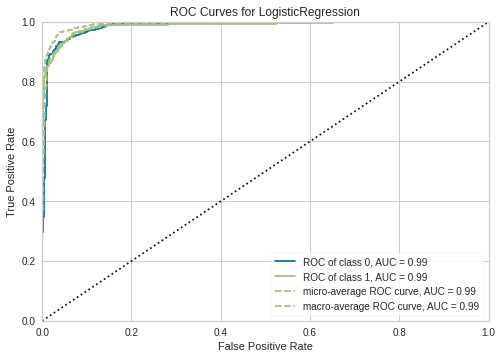

In [701]:
plot_model(estimator = tuned_lr, plot = 'auc')

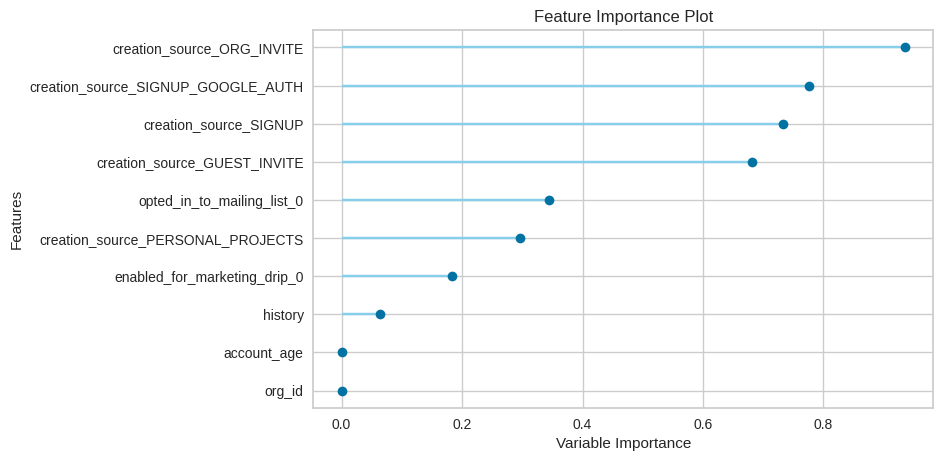

In [702]:
plot_model(estimator = tuned_lr, plot = 'feature')

As I am running late for the overall springboard curriculum I would like to keep this submission to this much only. 